In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('Banknote-authentication-dataset.csv')

In [9]:
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [11]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


Text(0, 0.5, 'V2')

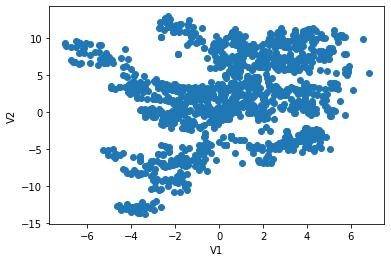

In [12]:
plt.scatter(x='V1',y='V2', data=df)
plt.xlabel('V1')
plt.ylabel('V2')

In [13]:
df1 = pd.read_csv('csv_result-php50jXam.csv',index_col=0)

In [33]:
df1

,V1,V2,V3,V4,Class
id,,,,,
1,3.62160,8.66610,-2.8073,-0.44699,1
2,4.54590,8.16740,-2.4586,-1.46210,1
3,3.86600,-2.63830,1.9242,0.10645,1
4,3.45660,9.52280,-4.0112,-3.59440,1
5,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1368,0.40614,1.34920,-1.4501,-0.55949,2
1369,-1.38870,-4.87730,6.4774,0.34179,2
1370,-3.75030,-13.45860,17.5932,-2.77710,2


In [14]:
df1.tail()

,V1,V2,V3,V4,Class
id,,,,,
1368,0.40614,1.34920,-1.4501,-0.55949,2
1369,-1.38870,-4.87730,6.4774,0.34179,2
1370,-3.75030,-13.45860,17.5932,-2.77710,2
1371,-3.56370,-8.38270,12.3930,-1.28230,2
1372,-2.54190,-0.65804,2.6842,1.19520,2


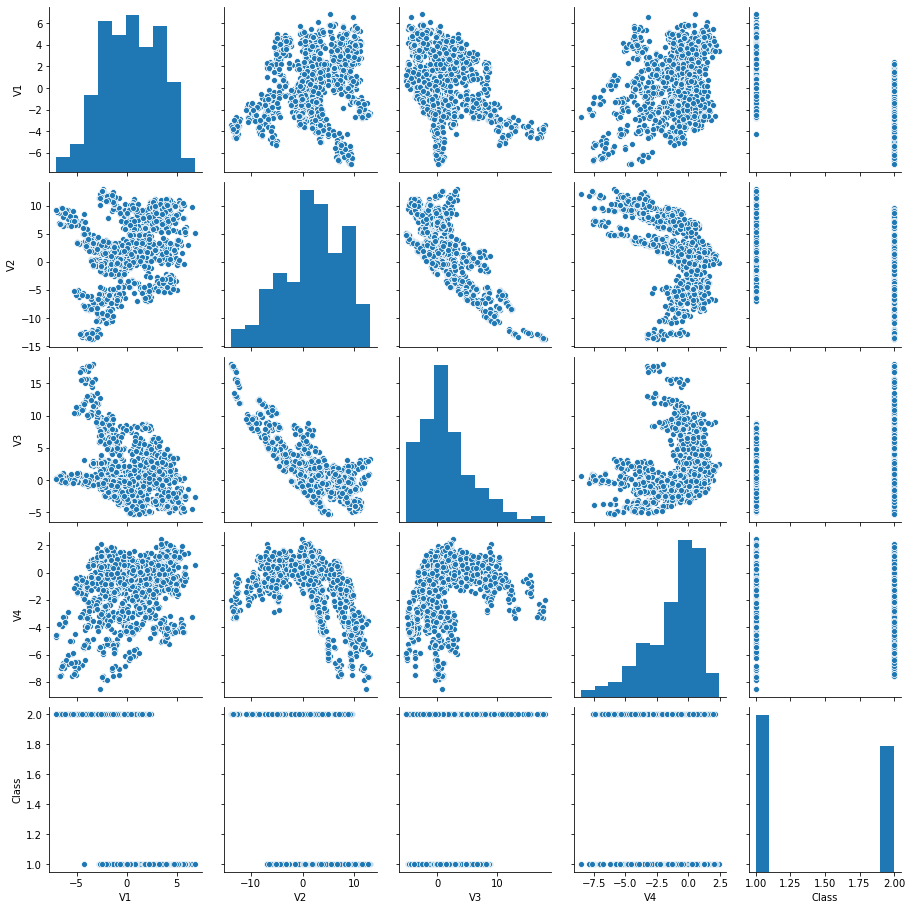

In [15]:
sns.pairplot(df1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Class',axis=1))


StandardScaler()

In [19]:
scaled_features=scaler.transform(df1.drop('Class', axis=1))

In [20]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

In [26]:
principalDF = pd.DataFrame(data=principalComponents,columns=['PC 1', 'PC 2'])
finalDF = pd.concat([principalDF,df1['Class']],axis=1)

In [29]:
finalDF['Class']

0       NaN
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1368    2.0
1369    2.0
1370    2.0
1371    2.0
1372    2.0
Name: Class, Length: 1373, dtype: float64

In [31]:
finalDF.dropna(inplace=True)
finalDF

,PC 1,PC 2,Class
1,-1.639441,-1.093812,1.0
2,0.513919,-1.324880,1.0
3,-2.310952,-0.202514,1.0
4,1.193416,0.024654,1.0
5,-2.319123,-0.572343,1.0
...,...,...,...
1367,-0.221995,-0.290458,2.0
1368,1.909395,0.142149,2.0
1369,4.049327,2.036023,2.0
1370,3.019617,1.392140,2.0


In [19]:
from sklearn.model_selection import train_test_split

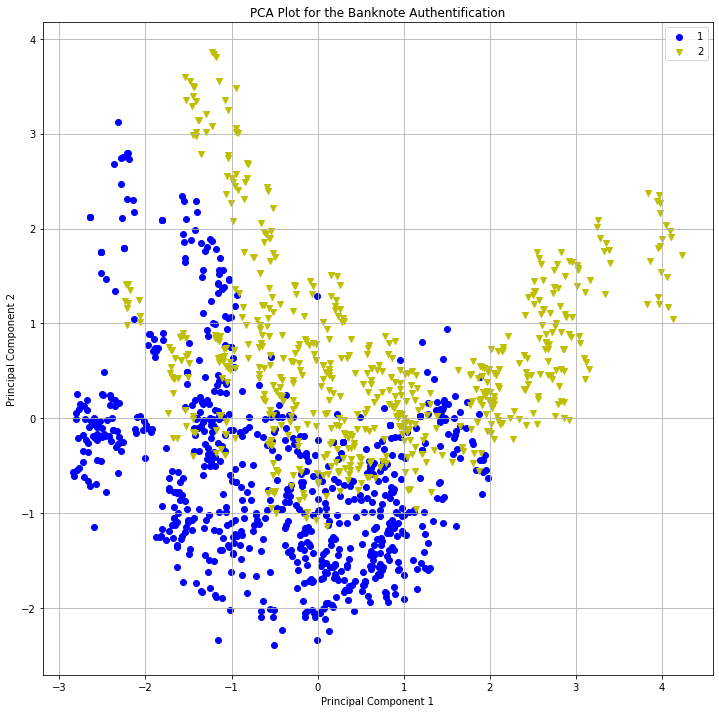

In [34]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Plot for the Banknote Authentification')
targets = [1,2]
colors = ['b', 'y']
markers = ['o','v']
for target,color,marker in zip(targets,colors,markers):
    indicesToKeep = finalDF['Class']==target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC 1']
               ,finalDF.loc[indicesToKeep, 'PC 2']
               , c=color, marker=marker)
ax.legend(targets)
ax.grid()

In [20]:
X = df1.drop('Class', axis = 1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.cluster import KMeans
km_res = KMeans(n_clusters=2)
km_res.fit(principalDF)
y_means = km_res.predict(principalDF)

In [40]:
km_res.cluster_centers_

array([[ 1.14055686, -0.31268952],
       [-1.20905878,  0.33146967]])

In [38]:
clusters = km_res.cluster_centers_

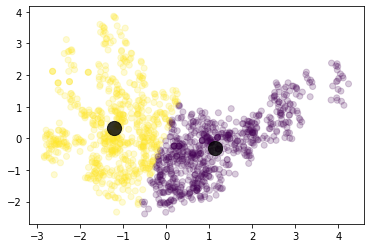

In [44]:
plt.scatter(principalDF['PC 1'],principalDF['PC 2'],c=y_means, cmap='viridis',alpha=0.2)
plt.scatter(clusters[:,0],clusters[:,1],s=200,c='black',alpha=0.8)